Etudier les corrélations entre pics de mentions et les ventes ou la satisfaction client

------------------- IMPACTS MENTIONS SUR LES VENTES ET NOTE MOYENNE ---------------------------------------

Spécification

L'idée est d'analyser dans quelle mesure la variable cible "volumes_commandes_total" et "note_moyenne" sont explicables par les variables explicatives suivantes : 
- volume_mentions_neutre
- volume_mentions_positives
- volumes_mentions_negatives
- volumes_mentions_total

Limite : les données sont agrégées par MOIS (histoire de mettre en rapport les posts et les commandes / notes sur la même échelle). Sauf que, nous n'avons les données que pour 13 mois. Le dataset fera 13 lignes. Cela exclue donc les modèles demandeurs de données tels les forêts ou autres, je pars sur un modèle simple de coefficient de Pearson (utilisé dans les heatmaps par exemple). 

In [2]:
import pandas as pd

df = pd.read_csv('models_KPIs_impacts_reseaux_sur_business.csv') 
print(df.head())


  annee_mois_post  volumes_mentions_neutres  volumes_mentions_positives  \
0         2023-12                     15613                       25216   
1         2024-01                     16409                       22294   
2         2024-02                     23978                       21786   
3         2024-03                     30838                       26620   
4         2024-04                     25156                       32684   

   volumes_mentions_negatives  volume_commandes_viables  \
0                       24661                      2814   
1                       13533                      9586   
2                       31480                      3479   
3                       22498                      2974   
4                       23615                      3504   

   volume_commandes_annulees  volume_commandes_total  volume_mentions_total  \
0                        961                    3775                  65490   
1                       3242        

In [4]:
df_ventes=df.drop(columns=["annee_mois_post","volume_commandes_viables","volume_commandes_annulees",])
df_ventes

,volumes_mentions_neutres,volumes_mentions_positives,volumes_mentions_negatives,volume_commandes_total,volume_mentions_total,note_moyenne
0,15613,25216,24661,3775,65490,3.02
1,16409,22294,13533,12828,52236,2.96
2,23978,21786,31480,4621,77244,3.04
3,30838,26620,22498,4034,79956,2.96
4,25156,32684,23615,4672,81455,3.11
5,35058,13952,34179,4101,83189,3.03
6,29055,24476,37904,4445,91435,3.10
7,31175,39753,26356,4329,97284,3.09
8,40927,29372,34782,4868,105081,3.00
9,13740,42741,35031,6400,91512,3.08


In [44]:
df_ventes.dtypes

volumes_mentions_neutres        int64
volumes_mentions_positives      int64
volumes_mentions_negatives      int64
volume_commandes_total          int64
volume_mentions_total           int64
note_moyenne                  float64
dtype: object

In [6]:
corr_matrix = df_ventes.corr(method='pearson')
print(corr_matrix)

                            volumes_mentions_neutres  \
volumes_mentions_neutres                    1.000000   
volumes_mentions_positives                  0.351152   
volumes_mentions_negatives                  0.629220   
volume_commandes_total                     -0.464901   
volume_mentions_total                       0.804106   
note_moyenne                                0.171021   

                            volumes_mentions_positives  \
volumes_mentions_neutres                      0.351152   
volumes_mentions_positives                    1.000000   
volumes_mentions_negatives                    0.518036   
volume_commandes_total                       -0.308432   
volume_mentions_total                         0.770102   
note_moyenne                                  0.517243   

                            volumes_mentions_negatives  \
volumes_mentions_neutres                      0.629220   
volumes_mentions_positives                    0.518036   
volumes_mentions_negatives

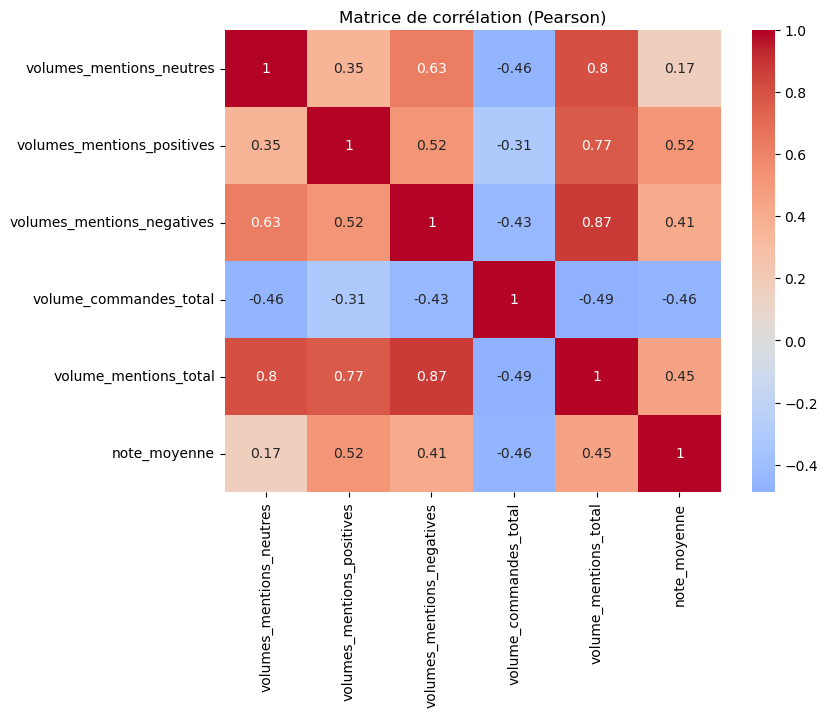

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation (Pearson)')
plt.show()

Interprétation : 

Si score Pearson = -1 => corrélation négative 
Si score Pearson = 0 => pas de corrélation 
Si score Pearson = 1 => corrélation positive 

----------- Impact des mentions sur les ventes ------------------------

L'impact des mentions est globalement négatif : au plus il y a de mentions, au moins il y a de ventes, et vice versa, dans une proportion modérée (comprise entre -0,31 et -0,49). 
Cela concerne les mentions négatives, comme neutres ou positives. 

--- La recommandation est donc de comprendre pourquoi : analyser les mentions qui sont faites sur les réseaux et comprendre pourquoi cela a une influence négative. 
Voici quelques hypothèses à creuser : est-ce qu'il y a de la modération sur mentions relatives aux posts ? Est-ce qu'il y a du community management ? Est-ce que les questions ou remarques des internautes en commentaires, trouvent réponse des équipes de Carttrend ? 
Si on regarde le verre à moitié plein : le terrain des réseaux sociaux reste un levier de croissance potentielle à exploiter donc pour qu'il puisse agir positivement sur les ventes. 

------------ Impact des mentions sur les notes ------------------------

Les mentions ont un impact sur les notes moyennes, dans une mesure comparable à l'impact sur les ventes : modérée. 
Au plus il y a de mentions, au plus la note moyenne augmente dans une optique modérée (car comprise entre 0,17 pour les mentions neutres et 0,52 pour les mentions positives, et 0,45 globalement). 

--- La recommandation est donc d'inviter tous les acheteurs à commenter les posts de Carttrend sur les réseaux afin de consolider cet impact actuellement modéré. 
